Abdulmujeeb Sakibu ayoni.sakibu@gmail.com ALT/SOD/023/1147

# Project Introduction
### Objective: Develop a machine learning model to predict house prices using a dataset containing various house-related features.
### Dataset: You will use the "House Prices - Advanced Regression Techniques" dataset from Kaggle (or any other relevant house price dataset).


# Import basic dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests # for getting the text file

# These import are to aid my visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Description Download

This section shows the full description of each column according to Kaggle<br>
The Kaggle dataset can be found @ https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data



In [2]:
# Using request to get the link to my dataset file from Drive
response = requests.get('https://drive.usercontent.google.com/download?id=1mIYZ5JD6Nms7_2kNmNlEaI1WT4LGmhrr&export=download&authuser=0&confirm=t&uuid=24cc9151-fce3-4269-994b-f98d6f29d58c&at=APZUnTU1kwSWHzUl7Pdq4RMfcmHS:1723667421227')
data = response.text # convert the response to text
print(data) # print the data

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# CSV Loading

In [3]:
# Using pandas to get and read my dataset directly from my google drive
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1WOVctOzv7GwyeQLI8QbM3GMM3P6Qi_C4&export=download&authuser=0&confirm=t&uuid=296ad8fd-e24f-420e-906a-0d837c64799f&at=APZUnTV7lgapZPcytlIiL3NRwWHw:1723666991305', index_col='Id')

In [4]:
df.head() # print the first 5 rows of the dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the general information about the dataset
display(df.shape)
df.info()

(1460, 80)

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [6]:
# Checking the description of the numerical columns
df.describe().T # I am transposing it to avoid the display from cutting it off in the middle

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
# Checking the gen description of the string columns
df.describe(include= 'object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Missing

In [8]:
# Checking for null values
nulls = df.isnull().sum()
nulls[nulls > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


## MiscFeature, PoolQC, Alley and Fence

All 4 columns have null values that are higher than 70% of the whole dataset so i intend to drop it rather than trying to retrive them

In [9]:
df = df.drop(['MiscFeature', 'PoolQC', 'Alley', 'Fence'], axis=1) # drop the listed columns
df.shape # recheck the shape

(1460, 76)

## Masonry Veneer

From the description, houses without Masonry Veneer are the null values

In [10]:
df['MasVnrType'] = df.MasVnrType.fillna('None') # fill null values with 'None'
df['MasVnrArea'] = df.MasVnrArea.fillna(0) # fill null values with 0

In [11]:
df['MasVnrType'].unique() # check the results of the fillna

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

## Fireplaces

In [12]:
# The Nan values are for houses without fireplaces, we can confirm with this code
df[['Fireplaces', 'FireplaceQu']].sample(5)

,Fireplaces,FireplaceQu
Id,,
422,1,TA
642,1,TA
849,1,Gd
925,1,TA
1295,0,NaN


In [13]:
df['FireplaceQu'] = df.FireplaceQu.fillna('None') # fill null values with 'None'

In [14]:
display(df.FireplaceQu.unique()) # check the result

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

## The Garage

*From the descriptions, It is obvious the Nan values comes from houses without a Garage*

In [15]:
# Filling the null values with 'None' and 0 where needed
df['GarageType'] = df.GarageType.fillna('None')
df['GarageFinish'] = df.GarageFinish.fillna('None')
df['GarageQual'] = df.GarageQual.fillna('None')
df['GarageCond'] = df.GarageCond.fillna('None')
df['GarageYrBlt'] = df.GarageYrBlt.fillna(0)

## Basement (BSMT)

Same with garage, the empty spots are for houses without a basement

In [16]:
df['BsmtFinType1'] = df.BsmtFinType1.fillna('None')
df['BsmtFinType2'] = df.BsmtFinType2.fillna('None')
df['BsmtExposure'] = df.BsmtExposure.fillna('None')
df['BsmtQual'] = df.BsmtQual.fillna('None')
df['BsmtCond'] = df.BsmtCond.fillna('None')

## LotFrontage

In [17]:
display(df[['LotFrontage']].value_counts()[:5])
df.LotFrontage.mean()

,count
LotFrontage,
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53


70.04995836802665

For the LotFrontage, I am filling it with the mean value because the values are pretty concentrated around the mean value

In [18]:
# Filling the mean values with the mean of the total values
df['LotFrontage'] = df.LotFrontage.fillna(df.LotFrontage.mean())

## Electrical

There is only one missing value, and since we can't just assume a house has no electricity, we can mark it as Not available or drop the column<br>
I am choosing to drop the column

In [19]:
df[df.Electrical.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [20]:
df = df.drop(1380, axis=0)

### That would be all with the missing values

In [21]:
# Checking the missing values again to be sure nothing is missed
nulls = df.isnull().sum()
nulls[nulls > 0]

,0


# EDA

In [22]:
df.shape # checking the shape again after the cleaning

(1459, 76)

## Checking the 'Target' Variable (SalePrice)

<Axes: xlabel='SalePrice', ylabel='Count'>

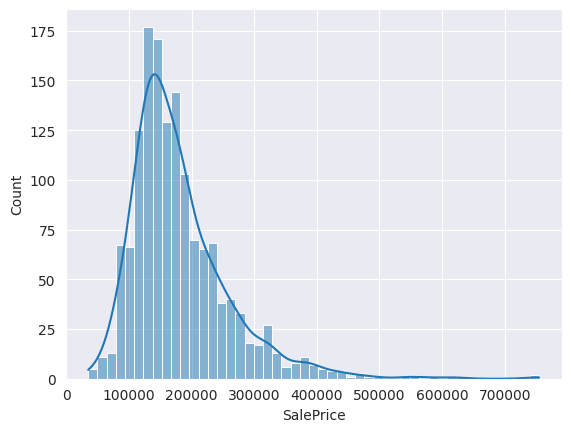

In [23]:
sns.histplot(df.SalePrice, kde=True)

In [24]:
print(f"skew\t {df.SalePrice.skew()}", end='\n\n') # check how skewed the prices are (greater than 1 is bad)
df.SalePrice.describe() # check the general description of the prices

skew	 1.8819429948035529



,SalePrice
count,1459.000000
mean,180930.394791
std,79468.964025
min,34900.000000
25%,129950.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


*We can see the Sales values are heavily Skewed, we can try to correct this before doing anymore visualizations using Natural Logrithms (np.log)*

In [25]:
# Replacing the current sales price it Log value to reduce it's skewness and center it
df["SalePrice"] = np.log(df.SalePrice)

<Axes: xlabel='SalePrice'>

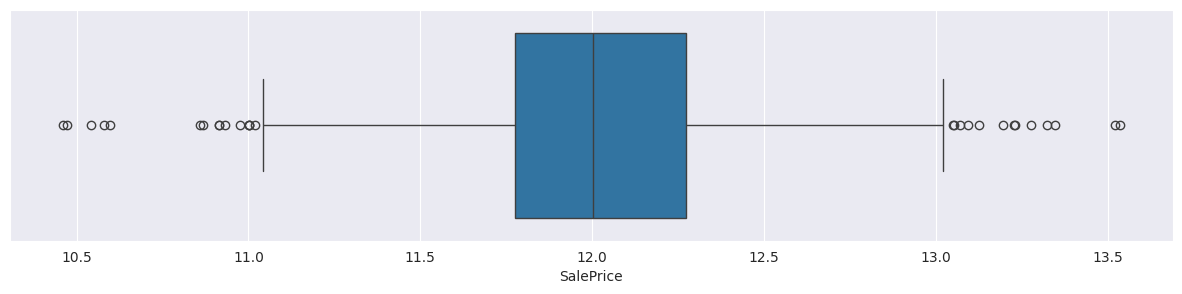

In [26]:
plt.figure(figsize=(15, 3)) # widen the boxplot
sns.boxplot(x=df.SalePrice) # create a boxplot to show how centered the prices are after using np.log)

## Checking other columns against the Target column <br>
This is because our main concern is the Saleprice of the house so I want to check how other columns influence it

<Axes: >

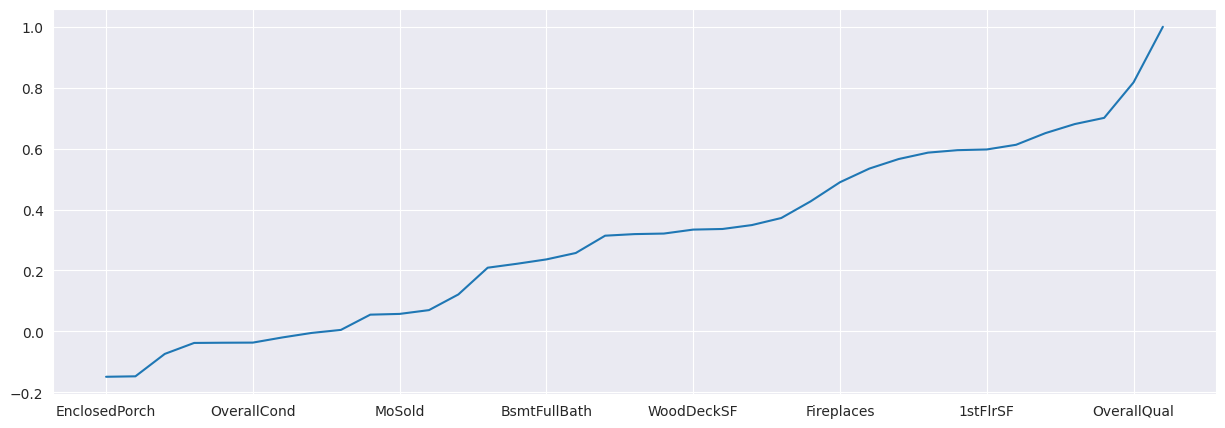

In [27]:
plt.figure(figsize=(15,5)) # widen the lineplot
# check the correlation of the columns to the Prices and plot it out
df.corr(numeric_only=True)['SalePrice'].sort_values().plot(kind='line')
#plt.xticks(rotation=30) #rotate the x_ticks

Using pairplot to group and check the relationships available among the columns. Focus is obviously on the SalePrice still

### For numerical columns

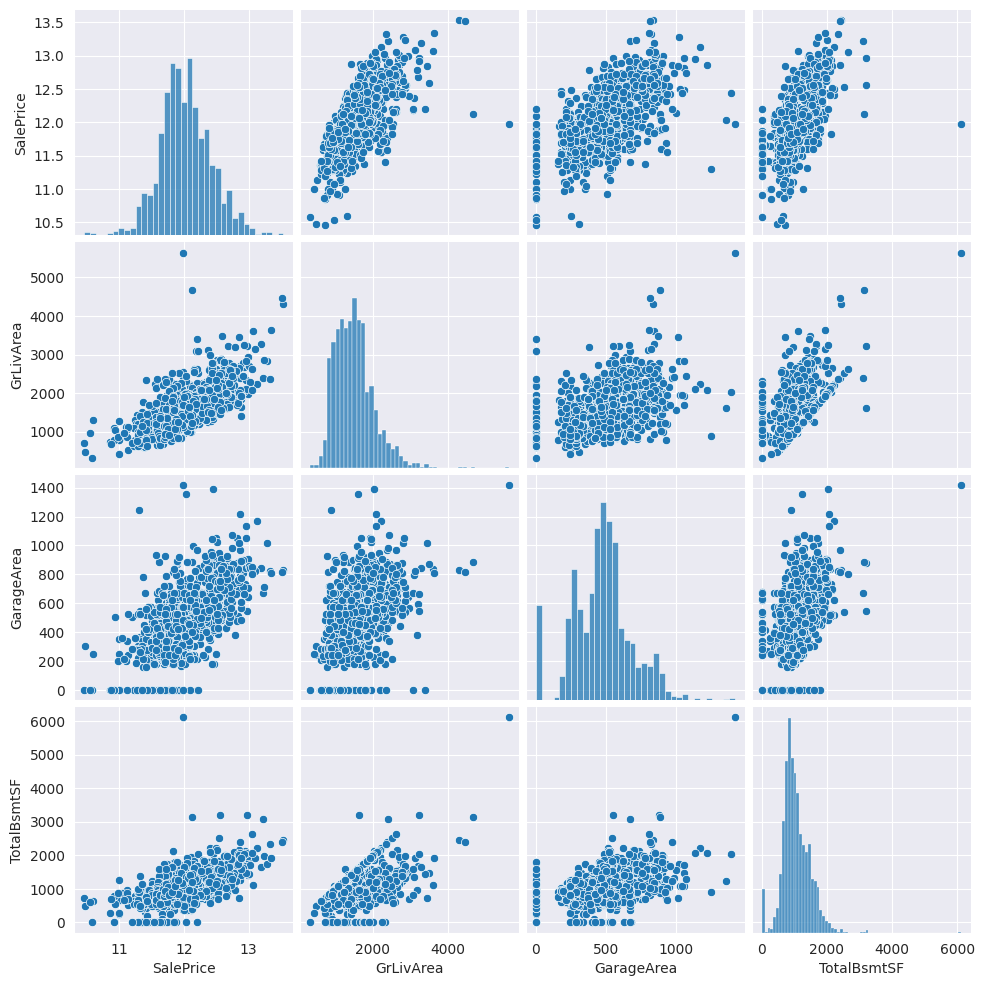

In [28]:
# Pairplot does an automatic plot for the columns listed
# It also comes with the bonus of letting us see the columns relationships
sns.pairplot(df[['SalePrice', 'GrLivArea', 'GarageArea','TotalBsmtSF']])

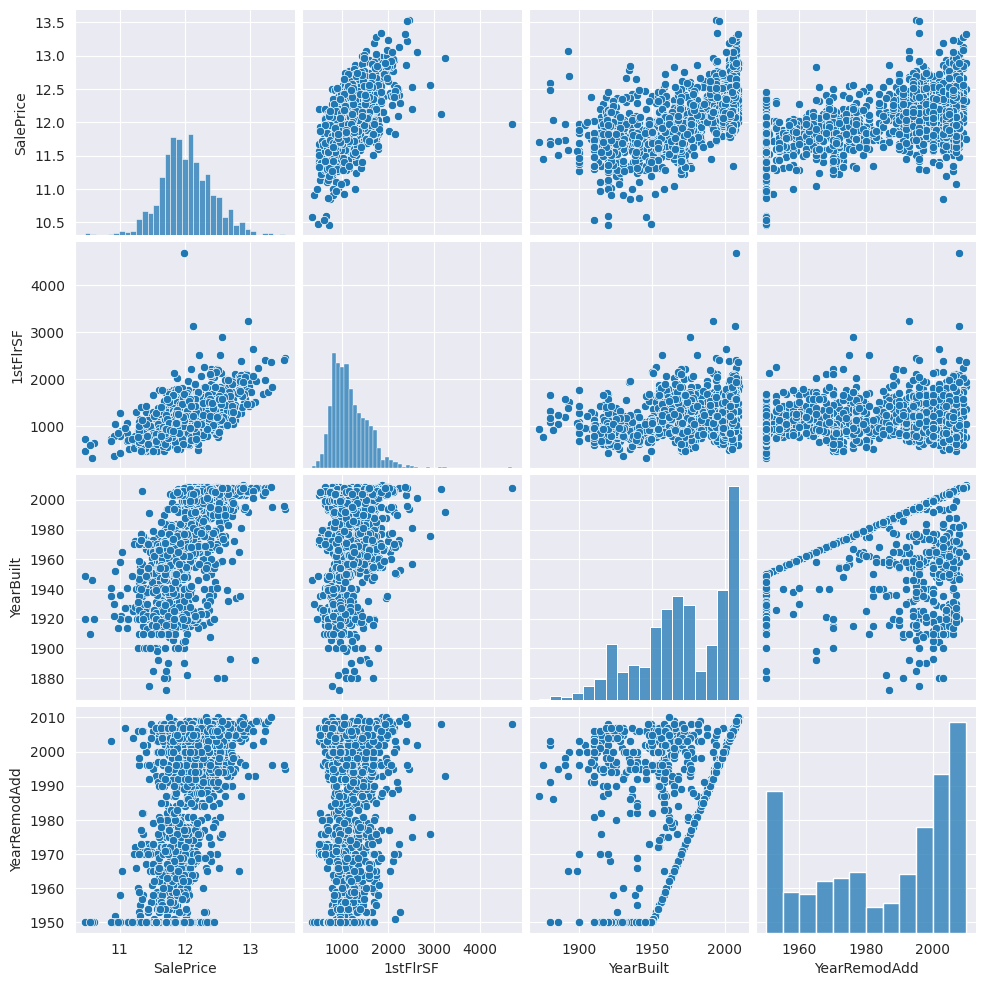

In [29]:
# Another pairplot with more numerical columns
sns.pairplot(df[['SalePrice', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']])

*We can see that most of our Numerical columns, while also a bit skewed, show a positice relationship with the SalePrice column*

### For categorical columns

Checking relationshipe for some of our categorical columns too

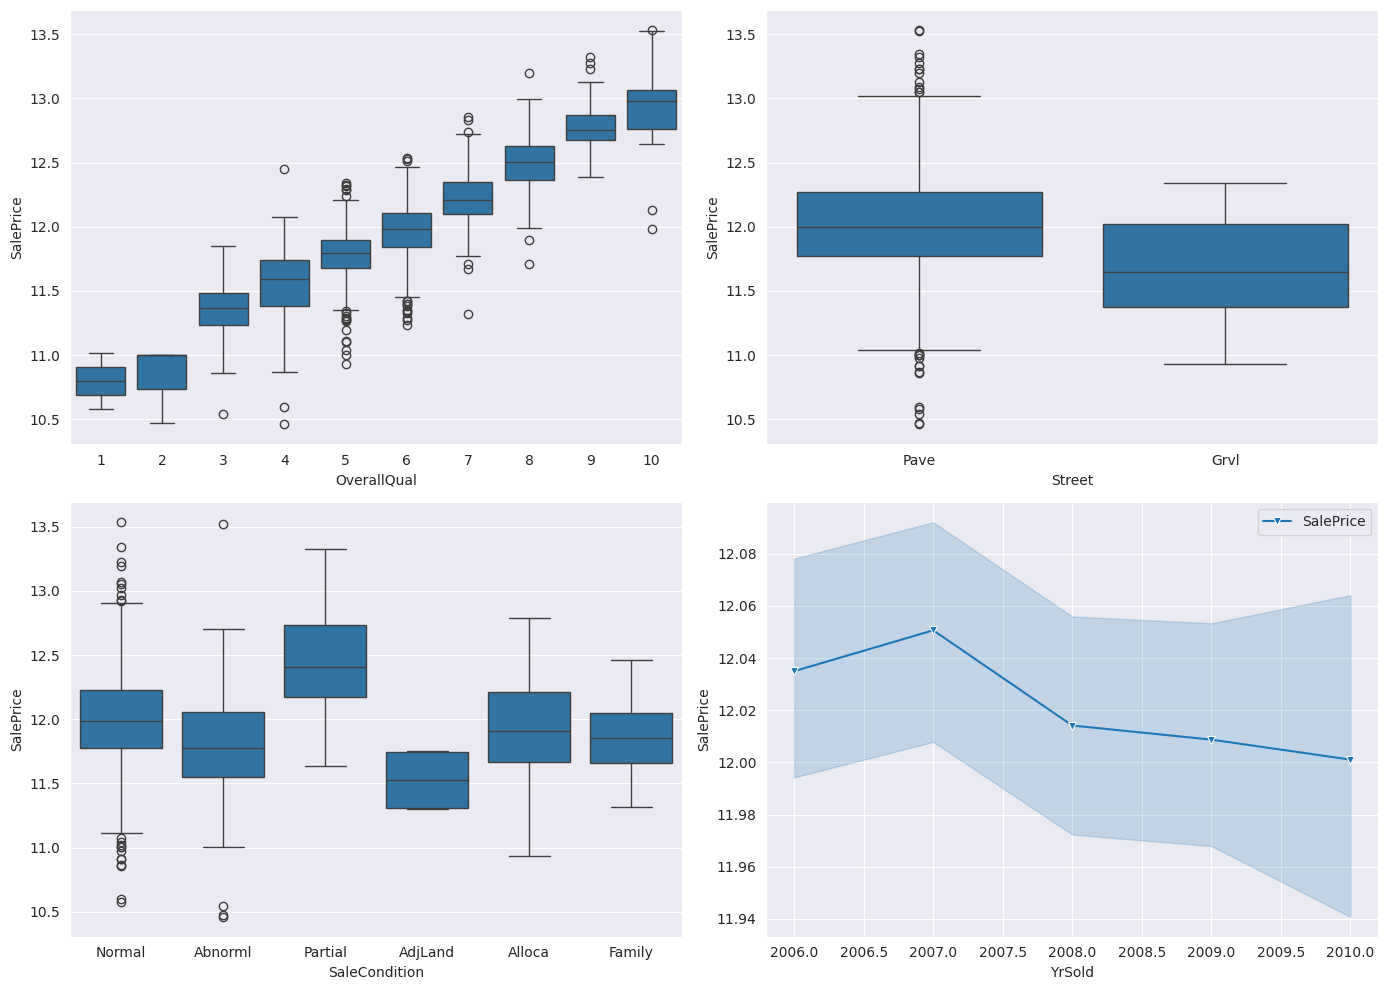

In [30]:
# Creating a subplot to manually pick the plots for the categorical columns with the sale price
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# boxplot to see the distribution of each category
sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=ax1)
sns.boxplot(x='Street', y='SalePrice', data=df, ax=ax2)
sns.boxplot(x='SaleCondition', y='SalePrice', data=df, ax=ax3)
# lineplot to see the trend
sns.lineplot(x='YrSold', y='SalePrice', data=df, label='SalePrice', marker='v', ax=ax4)

plt.tight_layout()
plt.show()

# Feature Engineering

Here, most of my focus would be on the non-numewrical columns. This is so i don't have to exclude it from my model training, since object type columns aren't readily regognized and would throw out an error instead

## Object columns

In [31]:
# categorizing the object columns into a single dataframe
dfo = df.select_dtypes(include=['object'])
dfc = dfo.columns.to_list() # getting the columns
display(dfo.shape) # checking the length of the rows columns

# dropping the columns and saving the remaining numeric columns result here to be used later
dff = df.drop(dfc, axis=1)
dff.sample(3, random_state=101)

(1459, 39)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
667,60,70.049958,18450,6,5,1965,1979,113.0,187,723,...,0,265,0,0,0,0,0,8,2007,11.767568
105,50,70.049958,7758,7,4,1931,1950,600.0,224,0,...,0,0,0,0,184,0,0,6,2007,12.040608
529,30,58.000000,9098,4,7,1920,2002,0.0,348,0,...,0,0,144,0,0,0,0,7,2007,11.362103


In [32]:
display(dfo.shape) # checking the shape to keep track of the changes

# Looping through the columns to find those with categories that are too skewed
# (i.e, where one category hold 80% of the dataset)
for i in dfc:
  val = dfo[i].value_counts().to_list()
  for j in val:
    if j/1459 > 0.8:
      dfo = dfo.drop(i, axis=1) # dropping them if the exist
display(dfo.shape) # checking the shape again


# This section is for splitting the categorical columns into their dummy variables with pd.get_dummies
column_df = pd.DataFrame() # initiate a new dataframe
dfc = dfo.columns.to_list() # get the columns
for i in dfc:
    dummy = pd.get_dummies(dfo[i], drop_first=True, dtype='int64') # get the dummy variables and drop first (to reduce space)
    column_df = pd.concat([column_df, dummy], axis = 1) # add the newly created dummy to the column_df

display(len(column_df)) # check the length of the new dataframe to ensure no errors

new_df = pd.concat([dff, column_df], axis=1) # add the numeric columns to the newly created dummies dataframe

(1459, 39)

(1459, 19)

1459

In [33]:
new_df.shape # see the new shape of our dataset

(1459, 159)

# Model Training and Evaluation

In [34]:
# Basic imports for spliting, training and scoring
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Imports for all the models i will be using today
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [36]:
scale = StandardScaler() # initiate the standard scaler

# Fitting and transforming the independent variables
X_scaled = scale.fit_transform(new_df.drop('SalePrice', axis=1)) #dropped SalePrice for y

y = new_df[['SalePrice']].values.ravel() # get the dependent variable and flatten it with ravel

In [37]:
# Perform a train test split on the X and y data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

## Testing to see which model works best for my dataset

In [38]:
# For testing to see which model works best for my dataset
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": XGBRegressor()
} # Loading the models into a dict

In [39]:
cv_results = {} # creating an empty dict to save the scores

# Loop through the models and perform cross-validation
for name, model in models.items():
    # use the cross val score to check the model performance and save it in the dictionary
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.mean(np.sqrt(-score))

# get the name of the best performing model and svae it's initiation
best_model_name = min(cv_results, key=cv_results.get)
display(best_model_name)
best_model = models[best_model_name]

# We can then use the initiation to save, fit and make predictions on the test data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate the MSE, RMSE, and R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

'Gradient Boosting Regression'

In [46]:
display(f'The mean squrared error is: {mse}', f'The root mean squared error is {rmse}', f'The R2 is{r2}') #Results

'The mean squrared error is: 0.01690127013636933'

'The root mean squared error is 0.1300048850480986'

'The R2 is0.8922427899301358'

## Training the dataset

In [41]:
# Initialize, fit and make predictions with the GradientBoost model
GBR = GradientBoostingRegressor(n_estimators=500, max_depth = 1, random_state=101) # random state set to ensure repeatability
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)

In [42]:
# Calculate the MSE, RMSE and R2 for the model
g_mse = mean_squared_error(y_test, y_pred)
g_rmse = np.sqrt(g_mse)
g_r2 = r2_score(y_test, y_pred)

g_mse, g_rmse, g_r2

(0.01686850094037098, 0.12987879326653362, 0.8924517160705101)

I can also better show the linearity of my results on a scatterplot

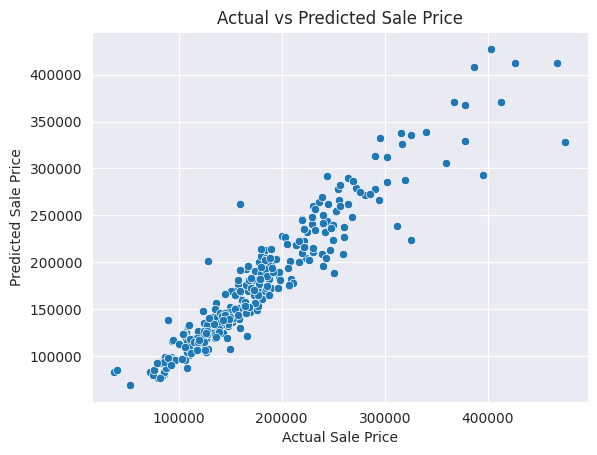

In [43]:
# Using scatterplot to get how linear my result is compared to the actual result
sns.scatterplot(x=np.exp(y_test), y=np.exp(y_pred))
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

## As a bonus, here is the rest of the algorithms and how they truly performed in the test above

In [44]:
# Create a dictionary to store the cross-validation scores and test MSE for each model
results = {
    "Model": [],
    "Cross-Validation MSE": [],
    "Test MSE": []
}

for model_name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_mse_mean = mse_scores.mean()

    # Train and evaluate on the test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_mse = mean_squared_error(y_test, y_pred)

    # Store the results in the dictionary
    results["Model"].append(model_name)
    results["Cross-Validation MSE"].append(cv_mse_mean)
    results["Test MSE"].append(test_mse)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [45]:
results_df

,Model,Cross-Validation MSE,Test MSE
0,Linear Regression,6.087862e+20,5.013740e+08
1,Gradient Boosting Regression,1.912432e-02,1.651834e-02
2,Support Vector Regression,3.146994e-02,3.183806e-02
3,Decision Tree Regression,5.079894e-02,5.363848e-02
4,Random Forest Regression,2.251554e-02,2.197374e-02
5,XGBoost Regression,2.323954e-02,1.906658e-02
